# 1. Importar librerías

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# 2. Obtener datos

#### Importar datos

In [60]:
df_total = pd.read_csv('Datasets/datos_preparados.csv')

#### Separar variable objetivo y hacer el split

In [61]:
X = df_total.drop(['target'], axis=1)
y = df_total.target

X_train, X_test, y_train, y_test = utils.split(X, y, test_size = 0.2)

X train shape:  (3520, 69)
y train shape:  (881, 69)
X test shape:  (3520,)
y test shape:  (881,)


## 3. Random Forest Classifier

#### Definir grilla

In [63]:
parameters = {'max_depth': [40,50,60,70],
              'max_features': [0.9,1],
              'max_leaf_nodes': [110,120,130],
              'min_samples_leaf': [3,5,7,9],
              'n_estimators': [800]}

#### Realizar la búsqueda

In [ ]:
ranfor = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

rand_s = RandomizedSearchCV(estimator=ranfor,
                            param_distributions=parameters,
                            n_iter=10,
                            scoring='f1',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)

#### Instanciar y ajustar modelo con los mejores hiperparámetros encontrados

In [64]:
ranfor_opt = RandomForestClassifier(
    class_weight = 'balanced',
    max_depth = 30,
    max_features = 1,
    max_leaf_nodes = 190,
    min_samples_leaf = 3,
    n_estimators = 1000,
    n_jobs = -1,
    random_state = 42
)
ranfor_opt.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=1,
                       max_leaf_nodes=190, min_samples_leaf=3,
                       n_estimators=1000, n_jobs=-1, random_state=42)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


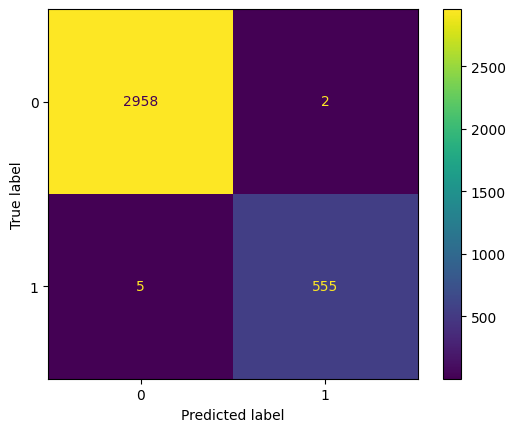

Precision: 0.9964093357271095
Recall: 0.9910714285714286
Especificidad: 0.9993243243243243
F1 score: 0.9937332139659804
Train score:  0.9980113636363637


In [65]:
precision_rf_train, recall_rf_train, especificidad_rf_train, f1_score_rf_train = utils.metricas(ranfor_opt, X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


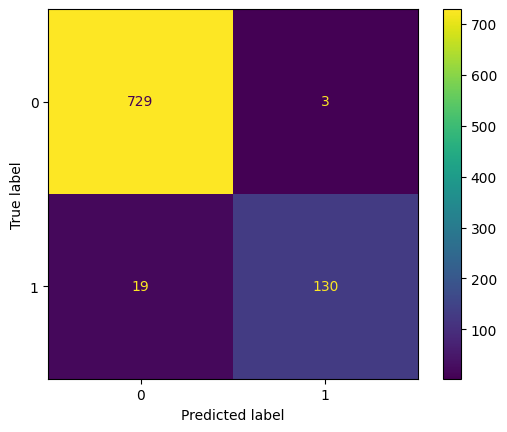

Precision: 0.9774436090225563
Recall: 0.87248322147651
Especificidad: 0.9959016393442623
F1 score: 0.9219858156028369
Train score:  0.9750283768444948


In [66]:
precision_rf_test, recall_rf_test, especificidad_rf_test, f1_score_rf_test = utils.metricas(ranfor_opt, X_test, y_test, 'TEST')

# 4. Xtreme Gradiant Boosting

#### Definir grilla

In [67]:
# Definición de cuadricula de hiperparametros
parameters_gb =  {'eta': [0.3,0.4,0.5,0.6],
              'colsample_bytree': [0.8,0.9,1],
              'max_depth': [4,6,8,10,12],
              'n_estimators': [800,1000,1200],
              'learning_rate':[0.1,0.2,0.3]
              }

#### Realizar búsqueda

In [ ]:
XGBmodel = XGBClassifier(random_state = 42, classmethod='')

rand_s_xgb = RandomizedSearchCV(estimator = XGBmodel,
                                param_distributions = parameters,
                                n_iter = 15,
                                scoring = 'recall',
                                cv=10,
                                n_jobs = -1,
                                verbose = False)
rand_s_xgb.fit(X_train, y_train)

#### Instanciar y ajustar modelo con mejores hiperparámetros

In [69]:
xgb_opt = XGBClassifier(
    random_state = 42,
    n_jobs = -1,
    learning_rate = 0.05,
    max_depth = 20,
    n_estimators = 1400,
    colsample_bytree = 0.9
)
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1400, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


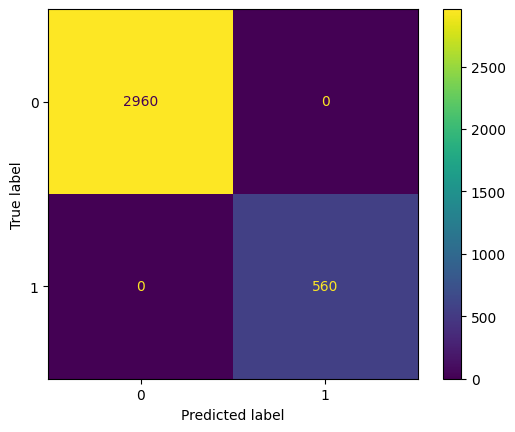

Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0
Train score:  1.0


In [70]:
precision_xgb_train, recall_xgb_train, especificidad_xgb_train, f1_score_xgb_train = utils.metricas(xgb_opt , X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


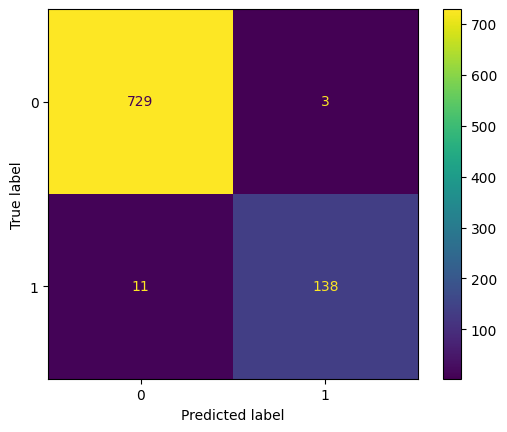

Precision: 0.9787234042553191
Recall: 0.9261744966442953
Especificidad: 0.9959016393442623
F1 score: 0.9517241379310345
Train score:  0.9841089670828603


In [71]:
precision_xgb_test, recall_xgb_test, especificidad_xgb_test, f1_score_xgb_test = utils.metricas(xgb_opt , X_test, y_test, 'TEST')

# 5. Suport Vector Machine 

#### Definir grilla

In [72]:
param_svm = {
    'C': [0.2,0.3,0.4,0.5,1],
    'gamma': [0.02,0.01,0.03,0.04]
    }

#### Hacer la búsqueda

In [17]:
svm = SVC(random_state = 42, class_weight = 'balanced')

rand_s_svm = RandomizedSearchCV(estimator = svm,
                            param_distributions = param_svm,
                            n_iter = 2,
                            scoring = 'f1',
                            cv = 5,
                            verbose = False,
                            n_jobs = -1)
rand_s_svm.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=SVC(class_weight='balanced', random_state=42),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.05, 0.1, 1]},
                   scoring='f1', verbose=False)

#### Instanciar y ajustar modelo con mejores hiperparámetros

In [73]:
svm_opt = SVC(class_weight='balanced',
          gamma=0.01,
          kernel='rbf',
          C=5,
          random_state=42,
          max_iter=-1
        )
svm_opt.fit(X_train, y_train)

SVC(C=5, class_weight='balanced', gamma=0.01, random_state=42)

#### Desempeño en train

------------------------------ TRAIN ------------------------------


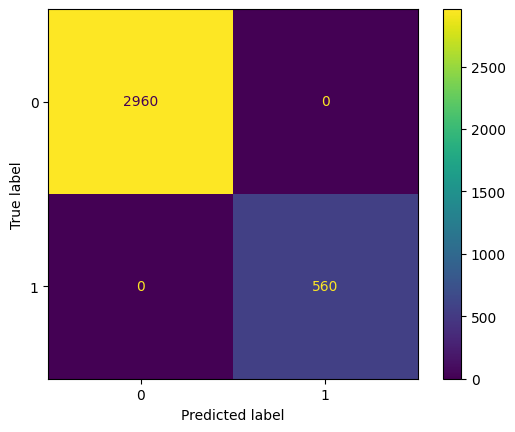

Precision: 1.0
Recall: 1.0
Especificidad: 1.0
F1 score: 1.0
Train score:  1.0


In [74]:
precision_svm_train, recall_svm_train, especificidad_svm_train, f1_score_svm_train = utils.metricas(svm_opt, X_train, y_train, 'TRAIN')

#### Desempeño en test

------------------------------ TEST ------------------------------


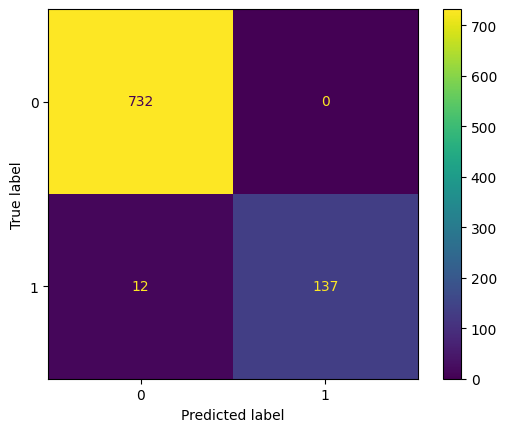

Precision: 1.0
Recall: 0.9194630872483222
Especificidad: 1.0
F1 score: 0.958041958041958
Train score:  0.9863791146424518


In [46]:
precision_svm_test, recall_svm_test, especificidad_svm_test, f1_score_svm_test = utils.metricas(svm_opt, X_test, y_test, 'TEST')